<a href="https://colab.research.google.com/github/Ryo-Tanohata/YoutubeAnalytics/blob/main/YouubeAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 データの取得

In [4]:
#JPvideos.xlsxをGoogle Drive からひっぱってくるやつ
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
 
auth.authenticate_user()
 
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'JPvideos.xlsx'", fields="files(id)").execute()
signate_api_key = results.get('files', [])
 
filename = "./JPvideos.xlsx"
os.makedirs(os.path.dirname(filename), exist_ok=True)
 
request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


#分析

In [ ]:
pd.read_json('test.json')

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
5,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
6,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
7,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
8,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
9,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [6]:
import pandas as pd
YTA=pd.read_excel('JPvideos.xlsx')

In [7]:
YTA.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,2018-07-02 00:00:00,陸自ヘリ、垂直に落下＝路上の車が撮影,時事通信映像センター,25.0,2018-02-06 12:04:37,"事故|""佐賀""|""佐賀県""|""ヘリコプター""|""ヘリ""|""自衛隊""|""墜落""|""落下""|""現...",188085.0,591.0,189.0,0.0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,1.0,0.0,0.0,佐賀県神埼市の民家に墜落した陸上自衛隊のＡＨ６４Ｄ戦闘ヘリコプターが垂直に落下する様子を、近...
1,ohObafdd34Y,2018-07-02 00:00:00,イッテQ お祭り男宮川×手越 巨大ブランコ②,神谷えりな Kamiya Erina 2,1.0,2018-02-06 13:01:56,[none],90929.0,442.0,88.0,174.0,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,0.0,0.0,0.0,NaN
2,aBr2kKAHN6M,2018-07-02 00:00:00,Live Views of Starman,SpaceX,28.0,2018-02-07 06:38:22,[none],6408303.0,165892.0,2331.0,3006.0,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,0.0,0.0,0.0,NaN
3,5wNnwChvmsQ,2018-07-02 00:00:00,東京ディズニーリゾートの元キャストが暴露した秘密5選,アシタノワダイ,25.0,2018-02-06 15:08:49,アシタノワダイ,96255.0,1165.0,277.0,545.0,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,0.0,0.0,0.0,東京ディズニーリゾートの元キャストが暴露した秘密5選\n\nかたまりクリエイトさま\n【検証...
4,B7J47qFvdsk,2018-07-02 00:00:00,榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報,シネマトゥデイ,1.0,2018-02-06 11:30:00,[none],108408.0,1336.0,74.0,201.0,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,0.0,0.0,0.0,家に帰ってきたサラリーマンのじゅん（安田顕）は、玄関で血を出して倒れている妻ちえ（榮倉奈々）...


In [ ]:
YTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21718 entries, 0 to 21717
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                21445 non-null  object        
 1   trending_date           8318 non-null   object        
 2   title                   20528 non-null  object        
 3   channel_title           20528 non-null  object        
 4   category_id             20524 non-null  float64       
 5   publish_time            20523 non-null  datetime64[ns]
 6   tags                    20525 non-null  object        
 7   views                   20522 non-null  float64       
 8   likes                   20522 non-null  float64       
 9   dislikes                20522 non-null  float64       
 10  comment_count           20522 non-null  float64       
 11  thumbnail_link          20522 non-null  object        
 12  comments_disabled       20522 non-null  float6

In [14]:
YTA.drop('trending_date', axis=1, inplace=True)

In [18]:
YTA.dropna(inplace=True)

In [19]:
YTA.isnull().sum()

video_id                  0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [20]:
YTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18398 entries, 0 to 21717
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                18398 non-null  object        
 1   title                   18398 non-null  object        
 2   channel_title           18398 non-null  object        
 3   category_id             18398 non-null  float64       
 4   publish_time            18398 non-null  datetime64[ns]
 5   tags                    18398 non-null  object        
 6   views                   18398 non-null  float64       
 7   likes                   18398 non-null  float64       
 8   dislikes                18398 non-null  float64       
 9   comment_count           18398 non-null  float64       
 10  thumbnail_link          18398 non-null  object        
 11  comments_disabled       18398 non-null  float64       
 12  ratings_disabled        18398 non-null  float6

In [21]:
# YTA['trending_date']=YTA['trending_date'].fillna(YTA['trending_date'].mode()[0])
YTA['publish_time'] = pd.to_datetime(YTA['publish_time']).dt.strftime("%Y-%m-%d")

In [22]:
YTA.head()

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,陸自ヘリ、垂直に落下＝路上の車が撮影,時事通信映像センター,25.0,2018-02-06,"事故|""佐賀""|""佐賀県""|""ヘリコプター""|""ヘリ""|""自衛隊""|""墜落""|""落下""|""現...",188085.0,591.0,189.0,0.0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,1.0,0.0,0.0,佐賀県神埼市の民家に墜落した陸上自衛隊のＡＨ６４Ｄ戦闘ヘリコプターが垂直に落下する様子を、近...
3,5wNnwChvmsQ,東京ディズニーリゾートの元キャストが暴露した秘密5選,アシタノワダイ,25.0,2018-02-06,アシタノワダイ,96255.0,1165.0,277.0,545.0,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,0.0,0.0,0.0,東京ディズニーリゾートの元キャストが暴露した秘密5選\n\nかたまりクリエイトさま\n【検証...
4,B7J47qFvdsk,榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報,シネマトゥデイ,1.0,2018-02-06,[none],108408.0,1336.0,74.0,201.0,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,0.0,0.0,0.0,家に帰ってきたサラリーマンのじゅん（安田顕）は、玄関で血を出して倒れている妻ちえ（榮倉奈々）...
5,OIDfjdGERr8,有賀さつきさんの死因を元夫・和田圭が会見前に漏らし一同涙の嵐・・・,激白！！スーパー芸能チャンネル！！,22.0,2018-02-06,"有賀さつき|""八木亜希子""|""河野景子""|""貴乃花""|""三宅""|""ありがさつき""|""和田圭""",193593.0,0.0,0.0,53.0,https://i.ytimg.com/vi/OIDfjdGERr8/default.jpg,0.0,1.0,0.0,Twitter始めました！\n\n登録よろしくお願いします＾＾\nhttps://twitt...
7,MPQaySneSUc,直撃LIVE グッディ! 2018年2月6日 180206,バイキング 2018,23.0,2018-02-06,[none],66272.0,51.0,167.0,164.0,https://i.ytimg.com/vi/MPQaySneSUc/default.jpg,0.0,0.0,0.0,直撃LIVE グッディ! 2018年2月6日 180206


In [23]:
YTA['publish_time'].nunique()#=pd.to_datetime(YTA['trending_date'])
#df['a'] = pd.to_datetime(df['a'])
# YTA.head(3)

135

In [24]:
YTA.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,18398.000000,1.839800e+04,1.839800e+04,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,19.785520,2.751613e+05,8.809367e+03,389.535710,1300.330797,0.071910,0.068160,0.000652
std,6.717243,1.357864e+06,8.842814e+04,2788.715339,15774.195410,0.258346,0.252026,0.025531
min,1.000000,7.980000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.877200e+04,1.430000e+02,10.000000,22.000000,0.000000,0.000000,0.000000
50%,22.000000,6.795000e+04,7.730000e+02,48.000000,151.000000,0.000000,0.000000,0.000000
75%,24.000000,1.891180e+05,2.548000e+03,194.000000,519.000000,0.000000,0.000000,0.000000
max,29.000000,6.279639e+07,4.470923e+06,119053.000000,905925.000000,1.000000,1.000000,1.000000


In [ ]:
YTA.describe(include='O')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,21445,8318,20528,20528,20523,20525,20522,18398
unique,13297,50,13091,4653,136,8762,13092,10741
top,#NAME?,2018-04-04 00:00:00,【吹いたら負け】話題の面白い画像集,DHCテレビ,2018-03-12,[none],https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,説明
freq,282,199,17,169,367,3200,8,94


In [25]:
YTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18398 entries, 0 to 21717
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                18398 non-null  object 
 1   title                   18398 non-null  object 
 2   channel_title           18398 non-null  object 
 3   category_id             18398 non-null  float64
 4   publish_time            18398 non-null  object 
 5   tags                    18398 non-null  object 
 6   views                   18398 non-null  float64
 7   likes                   18398 non-null  float64
 8   dislikes                18398 non-null  float64
 9   comment_count           18398 non-null  float64
 10  thumbnail_link          18398 non-null  object 
 11  comments_disabled       18398 non-null  float64
 12  ratings_disabled        18398 non-null  float64
 13  video_error_or_removed  18398 non-null  float64
 14  description             18398 non-null

In [26]:
y_col='views'

In [27]:
#説明変数
features=list(YTA.columns)
features.remove('views')
features

['video_id',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [28]:
YTA['publish_time'].nunique()

135

In [29]:
categorical_features=list(YTA.describe(include=['O']).columns)
categorical_features

['video_id',
 'title',
 'channel_title',
 'publish_time',
 'tags',
 'thumbnail_link',
 'description']

In [30]:
from sklearn import preprocessing
labels={}
for column in categorical_features:
    # print(train[column].shape)
    le= preprocessing.LabelEncoder()
    le.fit(YTA[column].astype(str))
    label={column:list(le.classes_)}
    labels.update(label)
    YTA[column]=le.transform(YTA[column].astype(str))

In [31]:
X=YTA[features]
y=YTA[y_col]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.20, random_state=2)

In [ ]:
y_train.head()

14051      83510.0
21267     547509.0
8625       11581.0
15296      51166.0
18442    4196932.0
Name: views, dtype: float64

In [ ]:
X_train.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14051,1643,10,7748,2416,17.0,92,7365,37.0,95.0,91.0,1817,0.0,0.0,0.0,2688
21267,8616,48,4810,3774,22.0,131,190,2067.0,884.0,517.0,8570,0.0,0.0,0.0,3176
8625,4417,50,10565,1502,23.0,55,1791,170.0,43.0,38.0,4586,0.0,0.0,0.0,3014
15296,2126,35,10958,566,22.0,98,7183,200.0,31.0,53.0,2299,0.0,0.0,0.0,9058
18442,10610,50,2738,254,10.0,117,8652,845046.0,1948.0,56047.0,10523,0.0,0.0,0.0,1013


In [33]:
import lightgbm as lgb
train_data = lgb.Dataset(data = X_train , label = y_train, categorical_feature=categorical_features)
valid_data = lgb.Dataset(data = X_val , label = y_val, categorical_feature=categorical_features)
params = {'objective' : 'regression',
            'metric' : 'rmse',
}
lgb_model = lgb.train(params , train_data , valid_sets=[train_data , valid_data], categorical_feature=categorical_features)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	training's rmse: 1.34375e+06	valid_1's rmse: 991488
[2]	training's rmse: 1.27532e+06	valid_1's rmse: 915431
[3]	training's rmse: 1.21944e+06	valid_1's rmse: 840618
[4]	training's rmse: 1.16735e+06	valid_1's rmse: 783808
[5]	training's rmse: 1.12527e+06	valid_1's rmse: 726167
[6]	training's rmse: 1.08567e+06	valid_1's rmse: 685152
[7]	training's rmse: 1.05416e+06	valid_1's rmse: 641504
[8]	training's rmse: 1.02388e+06	valid_1's rmse: 612495
[9]	training's rmse: 998343	valid_1's rmse: 589705
[10]	training's rmse: 977215	valid_1's rmse: 562591
[11]	training's rmse: 958350	valid_1's rmse: 549320
[12]	training's rmse: 942461	valid_1's rmse: 529660
[13]	training's rmse: 927799	valid_1's rmse: 521928
[14]	training's rmse: 900634	valid_1's rmse: 501631
[15]	training's rmse: 878498	valid_1's rmse: 487938
[16]	training's rmse: 860491	valid_1's rmse: 478366
[17]	training's rmse: 844566	valid_1's rmse: 470699
[18]	training's rmse: 831641	valid_1's rmse: 466950
[19]	training's rmse: 821040	vali

In [41]:
y_pred=lgb_model.predict(X_train)

In [43]:
y_pred-y_train

4611      82967.385211
16573     -2932.906659
8528     -74615.496165
11556     16802.239052
16080     -3169.595491
             ...      
17423    104592.367394
1309     -30589.433428
14049    -19763.374042
7850       4328.096353
3113     -19546.997051
Name: views, Length: 14718, dtype: float64

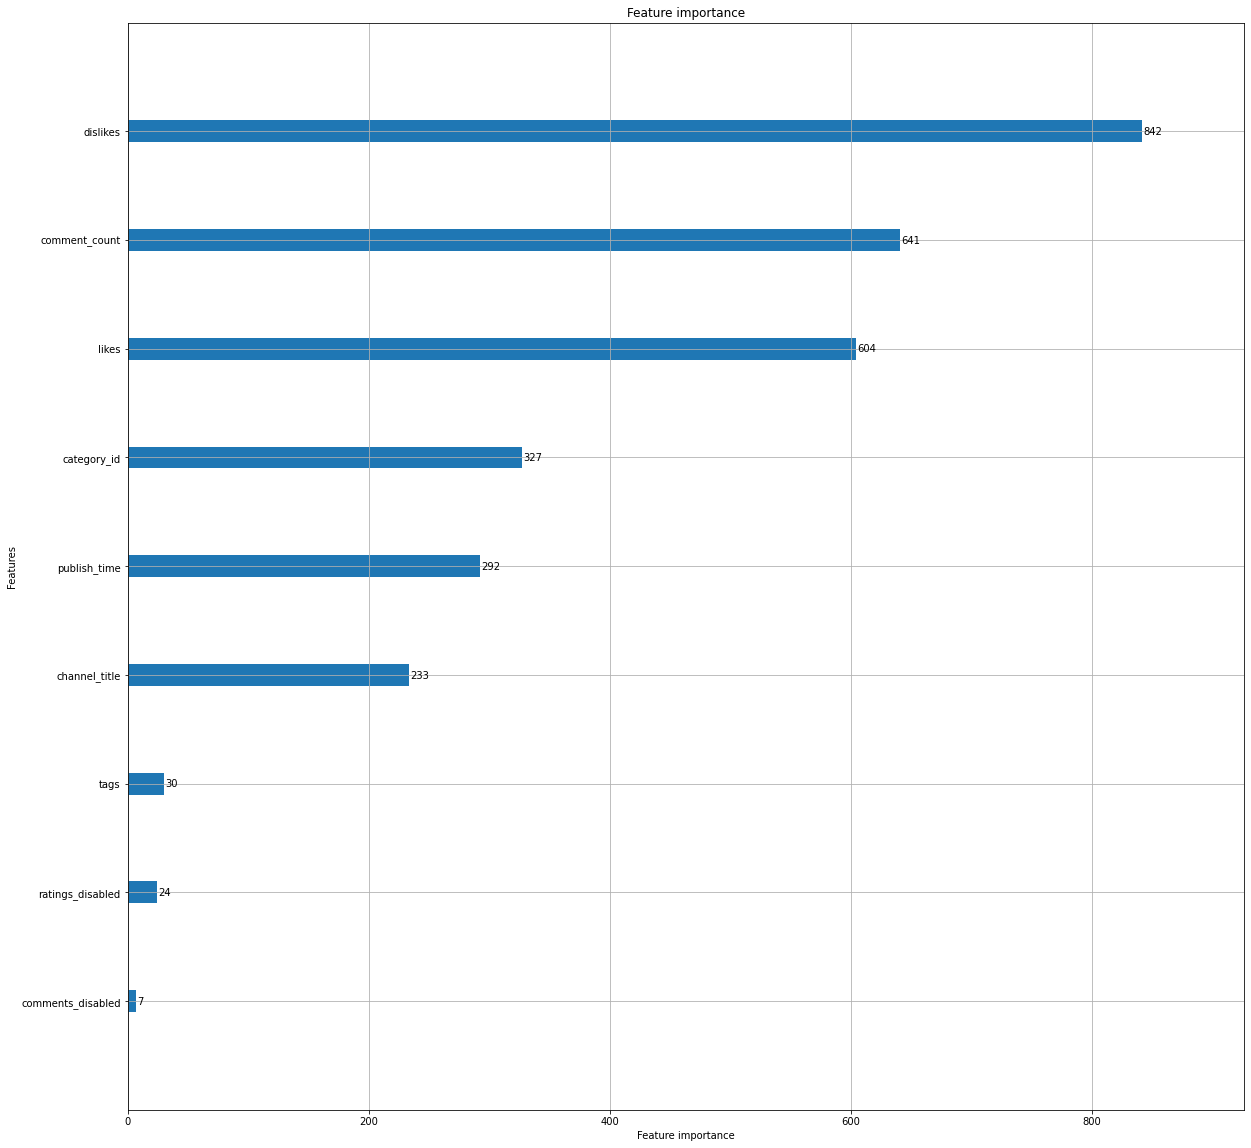

In [34]:
lgb_model.feature_importance()
lgb.plot_importance(lgb_model, figsize=(20,20))